In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [ ]:
data=pd.read_excel("Airlines+Data.xlsx")

In [ ]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction


In [ ]:
#dummify month
data1=pd.get_dummies(data, columns=['month'])

In [ ]:
data1.head()
#we have created 12 dummy variables for the month.

,Month,Passengers,Date,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data1['t']=pd.Series(range(1,97))
#we are creating a new column 't', which is time period.

In [ ]:
data1['t_square']=np.sqrt(data1['t'])

In [ ]:
data1['log_Passengers']=np.log(data1['Passengers'])

In [ ]:
data1["month"] = data1.Date.dt.strftime("%b") # month extraction

In [ ]:
data1.tail()

,Month,Passengers,Date,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square,log_Passengers,month
91,2002-08-01,405,2002-08-01,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,9.591663,6.003887,Aug
92,2002-09-01,355,2002-09-01,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,9.643651,5.872118,Sep
93,2002-10-01,306,2002-10-01,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,9.695360,5.723585,Oct
94,2002-11-01,271,2002-11-01,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9.746794,5.602119,Nov
95,2002-12-01,306,2002-12-01,2002,0,0,1,0,0,0,0,0,0,0,0,0,96,9.797959,5.723585,Dec


In [ ]:
data.month.value_counts()

Jan    8
Feb    8
Mar    8
Apr    8
May    8
Jun    8
Jul    8
Aug    8
Sep    8
Oct    8
Nov    8
Dec    8
Name: month, dtype: int64

In [ ]:
data.year.value_counts()
#they are continuous

1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
Name: year, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   Date        96 non-null     datetime64[ns]
 3   month       96 non-null     object        
 4   year        96 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ KB


In [ ]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
data.shape

(96, 5)

In [ ]:
data.isnull().sum()

Month         0
Passengers    0
Date          0
month         0
year          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

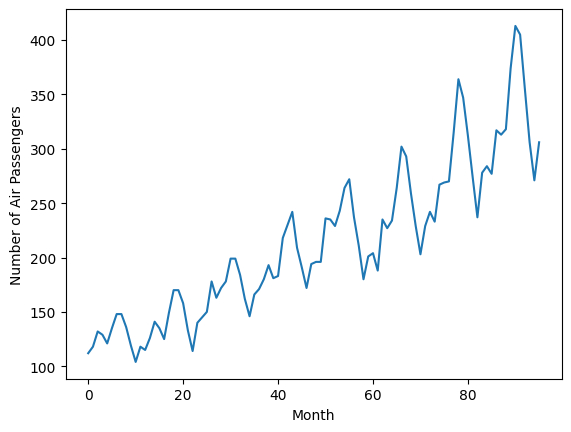

In [ ]:
#LINE PLOT
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data.Passengers)
#we can see upward trend
#multiplicative seasonality


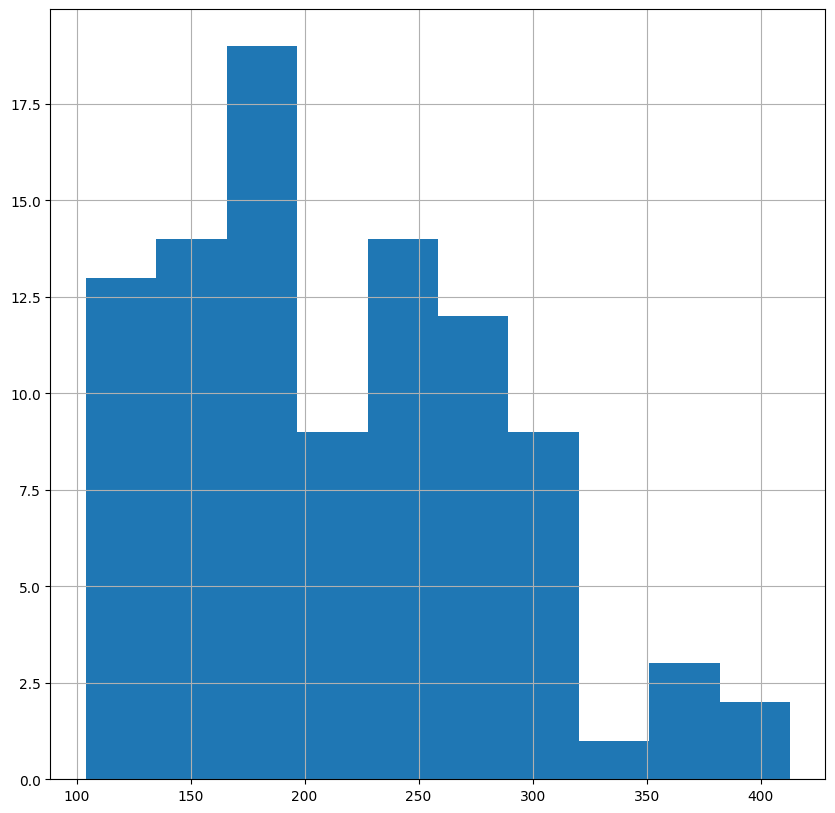

In [ ]:
#histogram
plt.figure(figsize=(10,10))
data['Passengers'].hist()
plt.show()
#most of the data lies between 120 to 310

<Axes: >

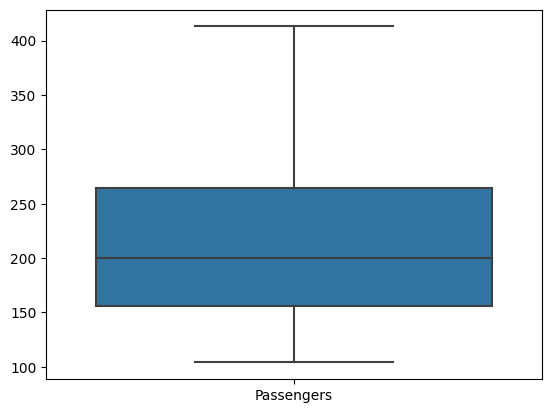

In [ ]:
#BOX-Plot
sns.boxplot(data)
#Boxplot, there are no outliers

<Axes: ylabel='Density'>

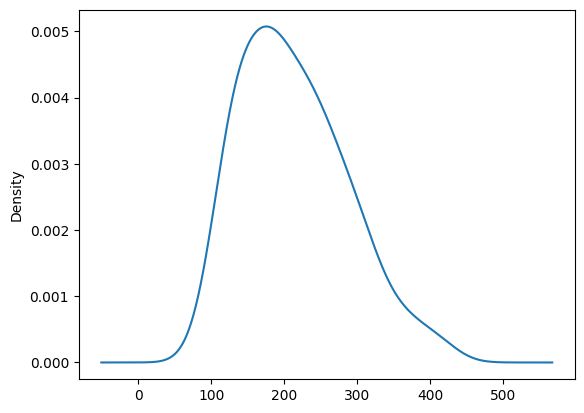

In [ ]:
#density plot
data['Passengers'].plot(kind='kde')
#from the plot we can say the distribution is nearly normal.

<ipython-input-24-a6b5d6ef3826>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Passengers'],kde=True)


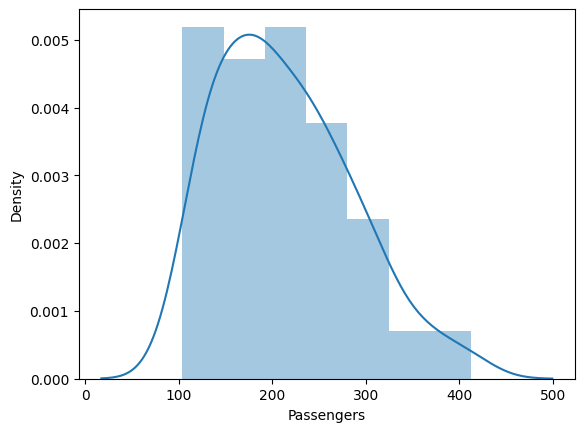

In [ ]:
sns.distplot(data1['Passengers'],kde=True)
plt.show()

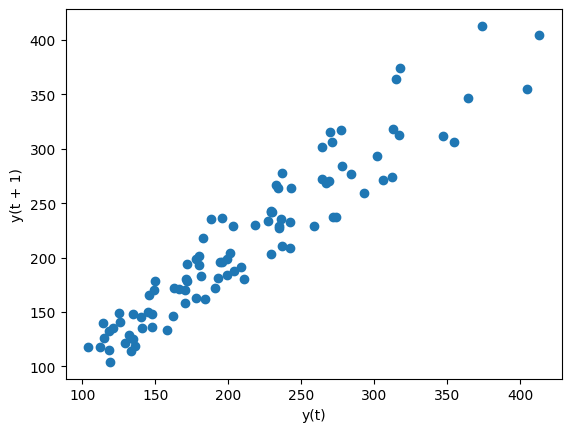

In [ ]:
#LAG PLOT
from pandas.plotting import lag_plot
lag_plot(data['Passengers'])
plt.show()

In [ ]:
#Auto-correlation plot
from statsmodels.graphics.tsaplots import plot_acf

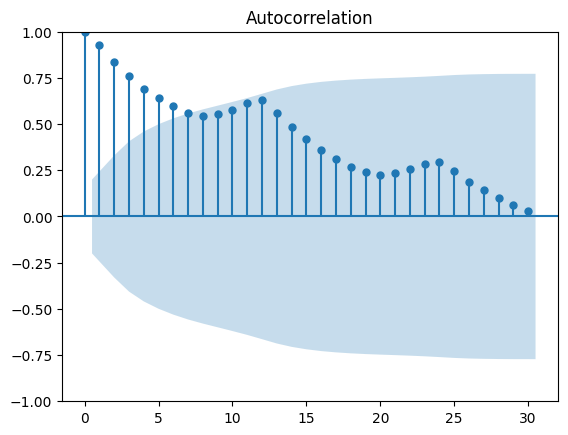

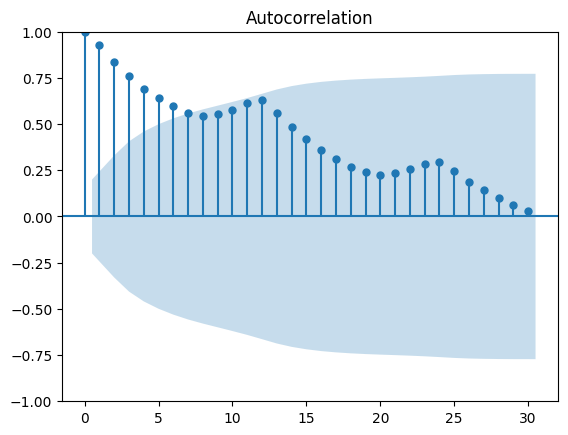

In [ ]:
plot_acf(data['Passengers'], lags=30)

#auto-correlation plot for 30 lags
#we can fing the seasonality and trend here

<Axes: xlabel='month', ylabel='year'>

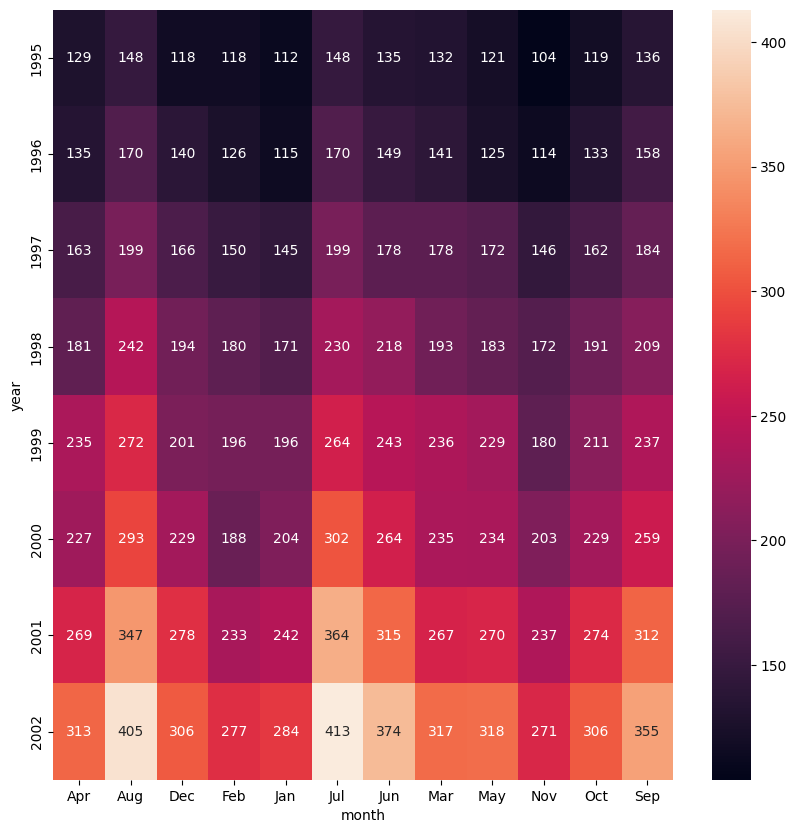

In [ ]:
#Heatmap
plt.figure(figsize=(10,10))
table=pd.pivot_table(data=data, values='Passengers',index='year', columns='month',fill_value=0)
sns.heatmap(table, annot=True,fmt="g")

In [ ]:
#In july and August 2002 more no.of passengers travelled
#passengers travelled is more in 1999,2000,2001,2002 compared to others.
#Overall in Aug and Jul more passengers travelled.
#least passengers travelled in 1995

<Axes: xlabel='year', ylabel='Passengers'>

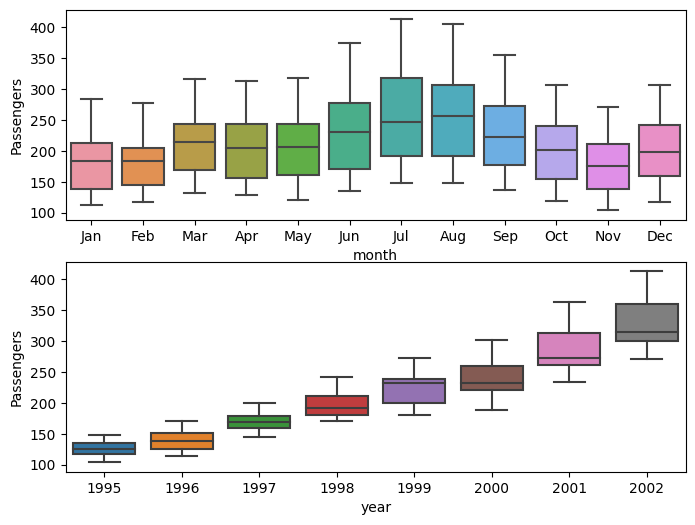

In [ ]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data1)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data1)


In [ ]:
data.shape

(96, 5)

Forecasting model based methods:

In [ ]:
#Split into X and Y
Train=data1.head(71)
Test=data1.tail(25)

In [ ]:
data1.head(2)

,Month,Passengers,Date,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square,log_Passengers,month
0,1995-01-01,112,1995-01-01,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1.000000,4.718499,Jan
1,1995-02-01,118,1995-02-01,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,1.414214,4.770685,Feb


In [ ]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

49.93200850689322

In [ ]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


42.12023840834468

In [ ]:
#Quadratic

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

47.226644443314804

In [ ]:
#Additive seasonality

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

126.22162484209177

In [ ]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

30.87087497065355

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

130.99439004213966

In [ ]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.780371336295719

In [ ]:
#Let us compare the results:
dat = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(dat)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.780371
4,rmse_add_sea_quad,30.870875
1,rmse_Exp,42.120238
2,rmse_Quad,47.226644
0,rmse_linear,49.932009
3,rmse_add_sea,126.221625
5,rmse_Mult_sea,130.994390


In [ ]:
#the least error is given by Multiplicative Additive Seasonality  model.

SimpleExponential Smoothening, Exponential Smoothening, Holts winter method

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Moving Average/Smoothening

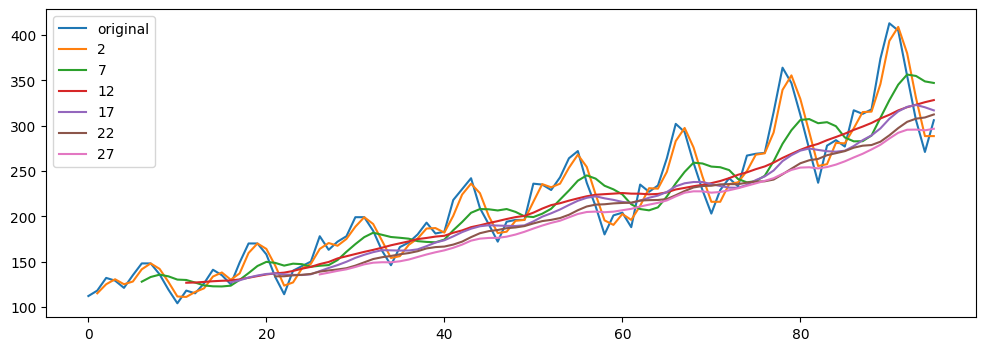

In [ ]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label='original')
for i in range(2,30,5):
  data.Passengers.rolling(i).mean().plot(label=str(i))
  plt.legend()


In [ ]:
#by the above graph the data seems to be like Upward trend and multiplicative seasoning

Time series decomposition plot

In [ ]:
#here we can see all the components of our time-series data

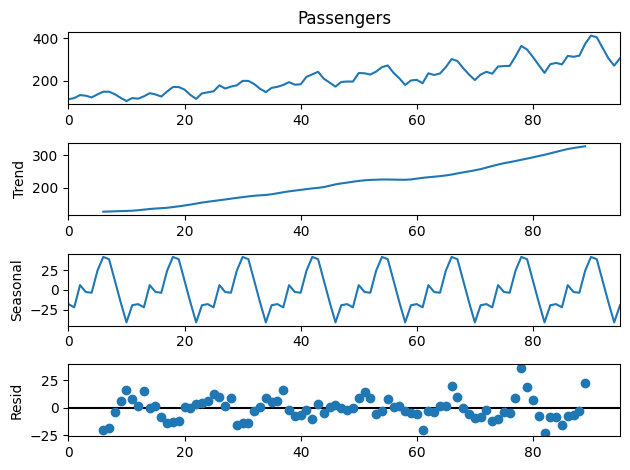

In [ ]:
decom_plot=seasonal_decompose(data.Passengers, period=12)
decom_plot.plot()
plt.show()

In [ ]:
#Evaluation Metric MAPE:  Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Method

In [ ]:
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

19.396296955156398

Holt method

In [ ]:
hw_model = Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

<ipython-input-50-76d1a8a3746c>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)


64.63519108644614

Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

12.874670907256002

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

8.881256457624072

In [ ]:
#Compared to all the models - Holts winter exponential smoothing with multiplicative seasonality and additive trend - gives very low error.

In [ ]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

71    224.869979
72    227.218773
73    229.718093
74    255.885154
75    248.384864
76    247.386116
77    267.884877
78    288.885364
79    290.718325
80    267.219400
dtype: float64

ARIMA

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data (1).xlsx


In [ ]:
Data=pd.read_excel("Airlines+Data.xlsx", index_col=0)

In [ ]:
Data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [ ]:
Data.shape

(96, 1)

In [ ]:
train=Data.head(76)
test=Data.tail(20)

In [ ]:
#we will now use Navie forecast model

In [ ]:
X=train.values
Y=test.values

In [ ]:
#Convert in float
X=X.astype('float32')
Y=Y.astype('float32')
from sklearn.metrics import mean_squared_error
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [ ]:
from math import sqrt
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=180.000, Expected=193.000
>Predicted=193.000, Expected=181.000
>Predicted=181.000, Expected=183.000
>Predicted=183.000, Expected=218.000
>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>

In [ ]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV, KFold


In [ ]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA RMSE',(order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' , (best_cfg, best_score))

In [ ]:
# load dataset

# evaluate parameters
p_values = range(0, 10)
d_values = range(0, 10)
q_values = range(0, 10)
warnings.filterwarnings("ignore")
#arima_order=p_values, d_values, q_values
evaluate_models(X,p_values, d_values, q_values)

Best ARIMA%s RMSE=%.3f (None, inf)


In [ ]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

In [ ]:

p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
# Fit the ARIMA model
evaluate_models(X, p_values, d_values, q_values)


Best ARIMA%s RMSE=%.3f (None, inf)
